In [57]:
from NeuralNetwork import NeuralNetwork
import random
import matplotlib.pyplot as plt

In [73]:
def calculate_abs_error(premises, conclusions, network):
    error = 0
    for i, premise in enumerate(premises):
        error = error + abs(network.decide(premise).item(0) - conclusions[i])
    return error

In [77]:
def train_network(premises, conclusions, network, precision_for_each, draw_error_over_epohs = False):
    still_needs_trainig = True
    errors = list()
    epohs = list()
    epoh = 0
    while still_needs_trainig:
        
        values_dict = list(zip(premises, conclusions))
        random.shuffle(values_dict)
        premises, conclusions = zip(*values_dict)
            
        for i, premise in enumerate(premises):
            network.learn(network.decide(premise), conclusions[i], premise)
            
        still_needs_trainig = False
        
        for i, premise in enumerate(premises):
            if abs(network.decide(premise)-conclusions[i]) > precision_for_each:
                still_needs_trainig = True
        
        if draw_error_over_epohs:
            epoh = epoh + 1
            errors.append(calculate_abs_error(premises, conclusions, network))
            epohs.append(epoh)
    
    if draw_error_over_epohs:
        plt.plot(epohs, errors, 'r--')
        plt.ylabel("absolute error")
        plt.xlabel("epoh")
        plt.show()

In [78]:
def predict(premises, conclusions, network):
    for i, premise in enumerate(premises):
        print("premise: {0} \nnetwork response: {1} \nnetwork conclusion: {2} \ntrue conclusion: {3}"
              .format(premise, network.decide(premise).item(0), network.decide(premise).item(0)>0.5, conclusions[i]>0.5))

------- training on or conclusions -------


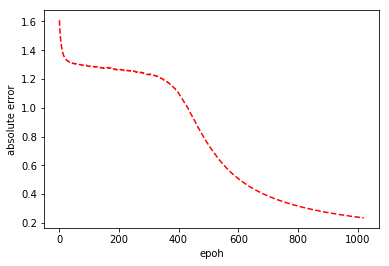

premise: [[0], [0]] 
network response: 0.0999977935242 
network conclusion: False 
true conclusion: False
premise: [[0], [1]] 
network response: 0.942576731397 
network conclusion: True 
true conclusion: True
premise: [[1], [0]] 
network response: 0.944950938717 
network conclusion: True 
true conclusion: True
premise: [[1], [1]] 
network response: 0.978396553613 
network conclusion: True 
true conclusion: True

------- training on and conclusions -------


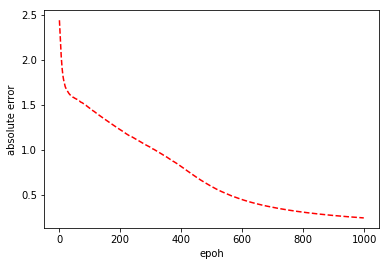

premise: [[0], [0]] 
network response: 0.00852407636561 
network conclusion: False 
true conclusion: False
premise: [[0], [1]] 
network response: 0.0694155263611 
network conclusion: False 
true conclusion: False
premise: [[1], [0]] 
network response: 0.0625863768129 
network conclusion: False 
true conclusion: False
premise: [[1], [1]] 
network response: 0.900038240583 
network conclusion: True 
true conclusion: True

------- training on xor conclusions -------


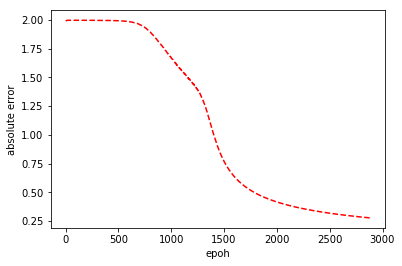

premise: [[0], [0]] 
network response: 0.0999799789152 
network conclusion: False 
true conclusion: False
premise: [[0], [1]] 
network response: 0.933134518993 
network conclusion: True 
true conclusion: True
premise: [[1], [0]] 
network response: 0.933050244712 
network conclusion: True 
true conclusion: True
premise: [[1], [1]] 
network response: 0.0420237230836 
network conclusion: False 
true conclusion: False



In [79]:
premises = [[[0], [0]],
            [[0], [1]],
            [[1], [0]],
            [[1], [1]]]

or_conclusions = [0,
                  1,
                  1,
                  1]
xor_conclusions = [0,
                   1,
                   1,
                   0]
and_conclusions = [0,
                   0,
                   0,
                   1]

print("------- training on or conclusions -------")
neural_network = NeuralNetwork(2, 3, 0.5)
train_network(premises, or_conclusions, neural_network, 0.1, draw_error_over_epohs = True)
predict(premises, or_conclusions, neural_network)
print("")

print("------- training on and conclusions -------")
neural_network = NeuralNetwork(2, 3, 0.5)
train_network(premises, and_conclusions, neural_network, 0.1, draw_error_over_epohs = True)
predict(premises, and_conclusions, neural_network)
print("")

print("------- training on xor conclusions -------")
neural_network = NeuralNetwork(2, 3, 0.5)
train_network(premises, xor_conclusions, neural_network, 0.1, draw_error_over_epohs = True)
predict(premises, xor_conclusions, neural_network)
print("")